<a href="https://colab.research.google.com/github/suleiman-odeh/NLP_Project_Team16/blob/main/test/sheet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mohamed Sonbol 50262724 Rawan Elkhouly 50302923 Abdelrahman Elkhayat 50351918 Ali Ghieth 50416697 Mostafa Abdelraouf 50382927 Fahid Al Khatieb 50193763 Suleiman Odeh 3391757

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
import pandas as pd
from scipy.optimize import least_squares
import scipy.integrate as integrate
import torch
import torch.nn as nn
import torch.optim as optim

Task 2.1.1

Data loaded successfully.
Total data points after trimming zeros: 453


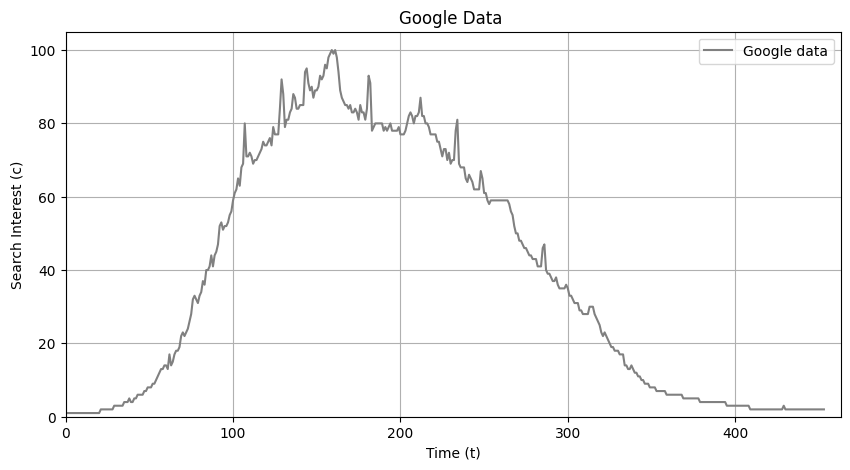

In [ ]:
def load_myspace_data():
    """
    Loads and processes the myspace.csv data


    Returns:
        (t, c): A tuple containing the time array (1..n) and
                the count array (with leading zeros trimmed).
                Returns (None, None) if the file is not found.
    """
    try:
        # Load the second column (index 1) of the CSV
        raw_data = np.genfromtxt('myspace.csv', delimiter=',', usecols=1)

        # Remove all leading zeros
        c = np.trim_zeros(raw_data, 'f')

        # Get the size of the remaining data
        n = c.size

        # Create the time array from 1 to n
        t = np.arange(1, n + 1)

        print(f"Data loaded successfully.")
        print(f"Total data points after trimming zeros: {n}")
        return t, c

    except FileNotFoundError:
        print("Error: 'myspace.csv' not found.")
        print("Please make sure the file is in the same directory.")
        return None, None
    except Exception as e:
        print(f"An error occurred during loading: {e}")
        return None, None

def plot_data(t_array, c_array):
    """
    Plots the myspace data.
    """
    plt.figure(figsize=(10, 5))
    plt.plot(t_array, c_array, label='Google data', color='grey')
    plt.title('Google Data ')
    plt.xlabel('Time (t)')
    plt.ylabel('Search Interest (c)')
    plt.legend()
    plt.grid(True)
    plt.ylim(0, 105)
    plt.xlim(0, t_array.size + 10)
    plt.show()

# --- Now, we use the functions ---
t, c = load_myspace_data()

# Only plot if the data was loaded successfully
if t is not None and c is not None:
    plot_data(t, c)

Task 2.1.2

weibull_pdf and weibull_cdf tests:


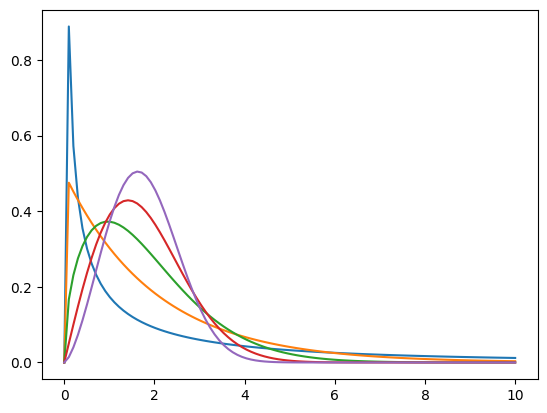

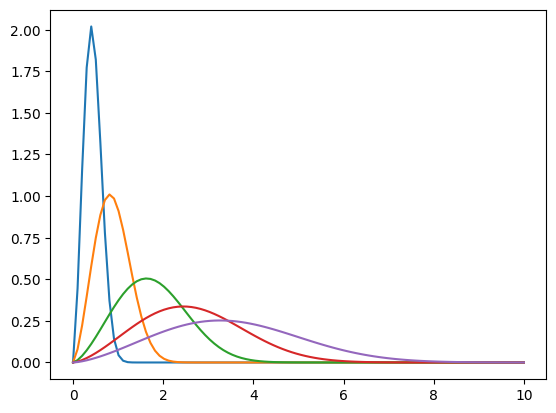

In [ ]:
def weibull_pdf(t, alpha, beta):
    """
    Implements the Weibull CDF (Equation 2)

    """
    t = np.asarray(t)
    pdf_val = np.zeros_like(t, dtype=float)
    # Only compute where t > 0
    mask = t > 0
    term = t[mask] / beta
    pdf_val[mask] = (alpha / beta) * np.power(term, alpha - 1) * np.exp(-np.power(term, alpha))
    # For t == 0 and alpha > 1, pdf is 0; for alpha == 1, it's alpha/beta; for alpha < 1, it's inf (but we leave as 0 or handle separately)
    return pdf_val

def weibull_cdf(t, alpha, beta):
    """
    Implements the Weibull CDF (Equation 2)

    """
    # Calculate the (t/beta) term
    term = t / beta

    # Equation 2: F(t|a,b) = 1 - exp(-(t/b)^a)
    cdf_val = 1 - np.exp(-np.power(term, alpha))
    return cdf_val

print("weibull_pdf and weibull_cdf tests:")

ts = np.linspace(0, 10, 100)
for alpha in [0.5, 1.0, 1.5, 2.0, 2.5]:
    plt.plot(ts, weibull_pdf(ts, alpha, 2.0), '-')
plt.show()
for beta in [0.5, 1, 2, 3, 4]:
    plt.plot(ts, weibull_pdf(ts, 2.5, beta), '-')
plt.show()

Task 2.2

Starting Newton's method for 20 iterations...
Initial guess: alpha=1.0000, beta=1.0000
Iteration 1: Gradient = [-17569205.63110063   3298661.        ]
Iteration 2: Gradient = [-6296759.46701349  1195809.03211968]
Iteration 3: Gradient = [-2220262.75156127   430581.11934461]
Iteration 4: Gradient = [-737597.75984578  150461.46439713]
Iteration 5: Gradient = [-180439.84716948   46326.73441815]
Iteration 5: alpha=0.1231, beta=0.1758
Iteration 6: Gradient = [-21066.84154611  16269.48086074]
Iteration 7: Gradient = [-15147.01976333   8674.2772646 ]
Iteration 8: Gradient = [-14233.09505875   4752.82433094]
Iteration 9: Gradient = [-13783.13195352   2643.20207467]
Iteration 10: Gradient = [-13240.09841171   1495.26638157]
Iteration 10: alpha=0.2676, beta=7.2825
Iteration 11: Gradient = [-12383.03113123    865.34721979]
Iteration 12: Gradient = [-10773.1335211     516.45219806]
Iteration 13: Gradient = [-6857.91369649   316.19743618]
Iteration 14: Gradient = [4053.2538581    98.29521268]
Itera

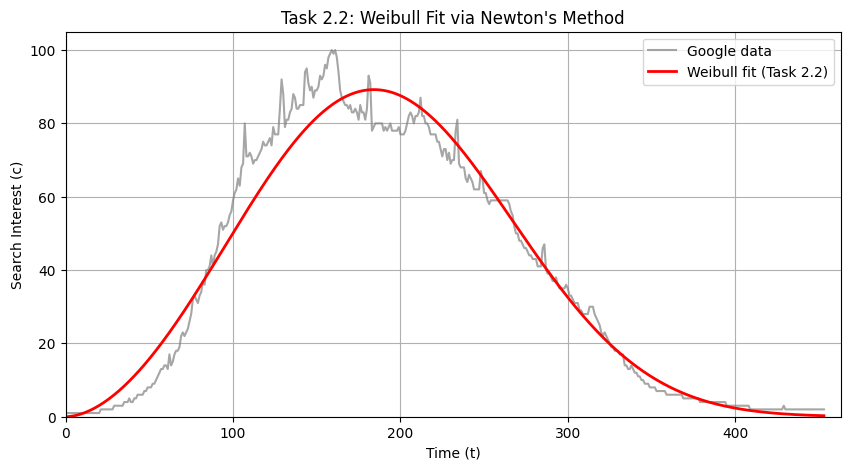

In [ ]:

# --- 1. Load data (use function from task 2.1) ---
# If t and c are not in memory, run the load_myspace_data() function
if 't' not in globals() or 'c' not in globals():
    t, c = load_myspace_data()


# --- 2. Set initial parameters ---
# As suggested by the PDF
alpha = 1.0
beta = 1.0

# Store parameters in a numpy array for vector operations
params = np.array([alpha, beta])

n_iterations = 20
print(f"Starting Newton's method for {n_iterations} iterations...")
print(f"Initial guess: alpha={params[0]:.4f}, beta={params[1]:.4f}")

# --- 3. Run the Newton's method loop ---
for k in range(n_iterations):
    alpha, beta = params[0], params[1]



    N = np.sum(c)                                 # Total number of observations N
    log_t = np.log(t)                             # log(x_i)

    # (t_j / beta)
    term = t / beta

    # (t_j / beta)^alpha
    term_pow_alpha = np.power(term, alpha)

    # log(t_j / beta)
    log_term = np.log(term)

    # Pre-calculate weighted sums to build the Gradient and Hessian
    # This replaces all the sum_i (...) in the formulas
    sum_log_t = np.sum(c * log_t)
    sum_term_pow_alpha = np.sum(c * term_pow_alpha)
    sum_term_pow_alpha_log_term = np.sum(c * term_pow_alpha * log_term)
    sum_term_pow_alpha_log_term_sq = np.sum(c * term_pow_alpha * (log_term**2))

    # --- 4. Build the Gradient vector ---
    # dL/da
    grad_alpha = (N / alpha) - (N * np.log(beta)) + sum_log_t - sum_term_pow_alpha_log_term

    # dL/db
    grad_beta = (alpha / beta) * (sum_term_pow_alpha - N)

    Gradient = np.array([grad_alpha, grad_beta])
    print(f"Iteration {k+1}: Gradient = {Gradient}")

    # --- 5. Build the Hessian matrix ---
    # d2L/da2
    hess_aa = (-N / (alpha**2)) - sum_term_pow_alpha_log_term_sq

    # d2L/db2
    hess_bb = (alpha / (beta**2)) * (N - (alpha + 1) * sum_term_pow_alpha)

    # d2L/dadb
    hess_ab = (1 / beta) * sum_term_pow_alpha + (alpha / beta) * sum_term_pow_alpha_log_term - (N / beta)

    Hessian = np.array([
        [hess_aa, hess_ab],
        [hess_ab, hess_bb]
    ])

    # --- 6. Implement the Newton Update (Equation 4) ---
    # params_new = params_old - inv(Hessian) @ Gradient
    try:
        step = la.inv(Hessian) @ Gradient
        params = params - step

        if params[0] <= 0 or params[1] <= 0:
            print(f"Iteration {k+1}: Parameters became non-positive, stopping.")
            break

        if (k+1) % 5 == 0:
            print(f"Iteration {k+1}: alpha={params[0]:.4f}, beta={params[1]:.4f}")

    except la.LinAlgError:
        print(f"Iteration {k+1}: Hessian is singular, stopping.")
        break

final_alpha, final_beta = params[0], params[1]

print("\n--- Task 2.2 Results ---")
print(f"Final estimated alpha: {final_alpha:.4f}")
print(f"Final estimated beta:  {final_beta:.4f}")

# --- 7. Plot the results ---

f_fit = weibull_pdf(t, final_alpha, final_beta)

# Find an "appropriate scaling factor"
# We'll scale it so the sum of the fitted curve matches the sum of the counts
scale_factor = np.sum(c) / np.sum(f_fit)
scaled_fit = f_fit * scale_factor

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(t, c, label='Google data', color='grey', alpha=0.7)
plt.plot(t, scaled_fit, label='Weibull fit (Task 2.2)', color='red', linewidth=2)
plt.title('Task 2.2: Weibull Fit via Newton\'s Method')
plt.xlabel('Time (t)')
plt.ylabel('Search Interest (c)')
plt.legend()
plt.grid(True)
plt.ylim(0, 105)
plt.xlim(0, t.size + 10)
plt.show()

Task 2.3

Data loaded successfully.
Total data points after trimming zeros: 453
Fitted parameters:
  A     = 17459.4112
  α     = 2.7310
  β     = 211.0244


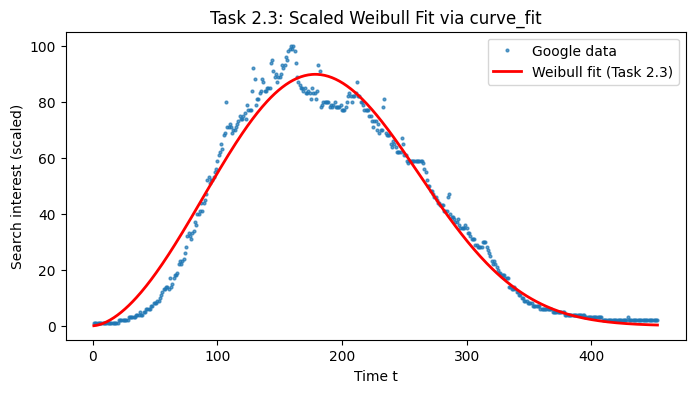

In [ ]:
def weibull_pdf3(t, alpha, beta):
    # Ensure t, alpha, beta are numpy arrays for broadcasting
    t = np.asarray(t)
    alpha = np.asarray(alpha)
    beta = np.asarray(beta)

    # Avoid division by zero or invalid powers
    if np.any(alpha <= 0) or np.any(beta <= 0) or np.any(t < 0):
        return np.zeros_like(t)

    return (alpha / beta) * (t / beta)**(alpha - 1) * np.exp(-(t / beta)**alpha)
def scaled_weibull(t, A, alpha, beta):
    """Model: A * Weibull PDF"""
    return A * weibull_pdf3(t, alpha, beta)

from scipy.optimize import curve_fit

# Load data
t, c = load_myspace_data()

# Initial guess
p0 = [1000, 2.0, 200.0]

# Bounds: (lower, upper) for (A, alpha, beta)
# alpha, beta must be > 0; A should also be >= 0
bounds = ([0, 1e-6, 1e-6], [np.inf, np.inf, np.inf])

# Fit
popt, pcov = curve_fit(
    scaled_weibull,
    t,
    c,
    p0=p0,
    bounds=bounds,
    maxfev=10000  # increase if needed
)

A_fit, alpha_fit, beta_fit = popt
print(f"Fitted parameters:")
print(f"  A     = {A_fit:.4f}")
print(f"  α     = {alpha_fit:.4f}")
print(f"  β     = {beta_fit:.4f}")
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(t, c, 'o', markersize=2, label='Google data', alpha=0.7)
plt.plot(t, scaled_weibull(t, *popt), 'r-', linewidth=2, label='Weibull fit (Task 2.3)')
plt.xlabel('Time t')
plt.ylabel('Search interest (scaled)')
plt.legend()
plt.title('Task 2.3: Scaled Weibull Fit via curve_fit')
plt.show()

Task 2.4

Task 2.4 estimates: alpha = 2.6459, beta = 213.4541


<BarContainer object of 453 artists>

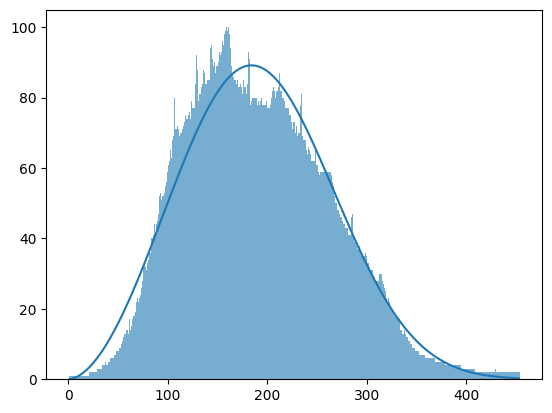

In [ ]:
def weibull_cdf(t, alpha, beta):
    return 1.0 - np.exp(- (t / beta) ** alpha)
def residuals(params, t, c):
    alpha, beta = params
    C = np.sum(c)
    t0 = np.concatenate(([0], t[:-1]))  # t0 = [0, 1, 2, ..., n-1]
    t1 = t                             # t1 = [1, 2, ..., n]

    # Compute pj = F(tj) - F(t_{j-1})
    F1 = weibull_cdf(t1, alpha, beta)
    F0 = weibull_cdf(t0, alpha, beta)
    pj = F1 - F0

    # Avoid zero probabilities
    pj = np.clip(pj, 1e-12, None)

    # Expected counts: C * pj
    expected = C * pj

    # Weighted residuals: (observed - expected) / sqrt(pj)
    # Note: we weight by 1/sqrt(pj) → residual = (c - expected) / sqrt(pj)
    resid = (c - expected) / np.sqrt(pj)
    return resid

# Initial guess
x0 = [2.0, 200.0]  # [alpha, beta]

# Bounds: both > 0
bounds = ([1e-8, 1e-8], [np.inf, np.inf])

# Run optimization
result = least_squares(
    residuals,
    x0,
    args=(t, c),
    bounds=bounds,
    max_nfev=2000
)

alpha_24, beta_24 = result.x
C = np.sum(c)
f_j = weibull_pdf(t, alpha, beta)
print(f"Task 2.4 estimates: alpha = {alpha_24:.4f}, beta = {beta_24:.4f}")
scale_factor = C  # or use curve_fit-like scaling if needed
plt.plot(t, scale_factor * f_j, label='Fitted Weibull')
plt.bar(t, c, width=1, alpha=0.6, label='Google data')

Task 2.5

Data loaded successfully.
Total data points after trimming zeros: 453
Task 5 gives us alpha = 2.873973048879787 and beta  = 215.78923027938524


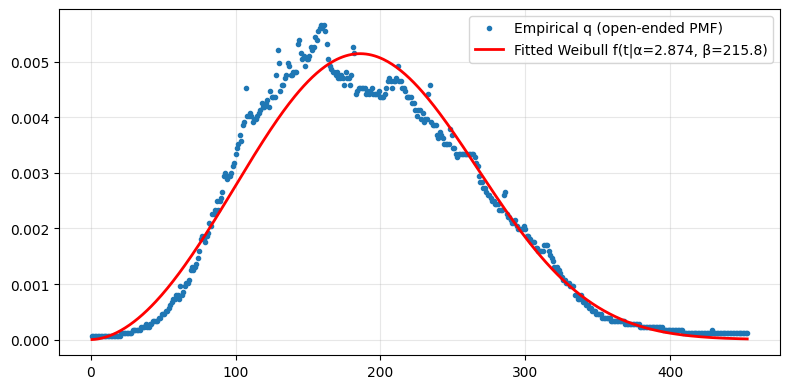

In [ ]:
from scipy.optimize import minimize

def make_open_ended_q(c, eps=1e-12):
    # computes  (qj = cj/ sum ci) * 0.98
    c = np.asarray(c, dtype=float)
    total = c.sum()
    q = (c / total) * 0.98

    # Ensure strictly positive entries to avoid infinite KL
    zero_mask = (q == 0)
    if zero_mask.any():
        q[zero_mask] = eps
        q = q / q.sum() * 0.98

    return q


def discrete_weibull_vector(t, alpha, beta, eps=1e-12):
    #Builds a discrete Weibull vector f_j = f(t_j | α, β) normalized to 0.98.
    raw = weibull_pdf(t, alpha, beta)
    s = raw.sum()
    if s <= 0:
        return None

    f = raw / s * 0.98
    f = np.where(f <= 0, eps, f)
    return f


def kl_divergence(f, q):
    #Computes D_KL(f || q) = sum f_j * log(f_j / q_j).
    return np.sum(f * np.log(f / q))


def fit_weibull_open_ended(t, c, alpha0=2.0, beta0=200.0):
    q = make_open_ended_q(c)

    def objective(x):
        alpha, beta = x
        if alpha <= 0 or beta <= 0:
            return 1e20 #large penalty

        f = discrete_weibull_vector(t, alpha, beta)
        if f is None:
            return 1e20

        return kl_divergence(f, q)

    result = minimize(
        fun=objective,
        x0=np.array([alpha0, beta0]),
        method="L-BFGS-B",
        bounds=((1e-8, None), (1e-8, None)),
        options={"maxiter": 1000}
    )

    alpha_hat, beta_hat = result.x
    f_hat = discrete_weibull_vector(t, alpha_hat, beta_hat)

    return {
        "alpha": alpha_hat,
        "beta": beta_hat,
        "f": f_hat,
        "q": q,
        "opt_result": result
    }


t, c = load_myspace_data()
result = fit_weibull_open_ended(t, c)

print("Task 5 gives us alpha =", result["alpha"],  "and beta  =", result["beta"])

# Extract fitted quantities
alpha_hat = result["alpha"]
beta_hat  = result["beta"]
f = result["f"]
q = result["q"]


plt.figure(figsize=(8, 4))
plt.plot(t, q, "o", markersize=3, label="Empirical q (open-ended PMF)")
plt.plot(t, f, "r-", linewidth=2, label=f"Fitted Weibull f(t|α={alpha_hat:.3f}, β={beta_hat:.1f})")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


task 2.6

In [ ]:

from scipy.special import gamma
from scipy.optimize import root_scalar

if 't' not in globals() or 'c' not in globals():
    t, c = load_myspace_data()


def fit_weibull_moments(t, c):

    t = np.asarray(t, dtype=float)
    c = np.asarray(c, dtype=float)

    # open-ended distribution q_j (sums to 0.98)
    q = c / c.sum() * 0.98

    # sample mean and variance under q
    m = np.sum(q * t)
    s2 = np.sum(q * t**2) - m**2
    cv2_emp = s2 / m**2

    # function whose root in alpha we want
    def g(alpha):
        g1 = gamma(1.0 + 1.0/alpha)
        g2 = gamma(1.0 + 2.0/alpha)
        cv2_theo = (g2 - g1**2) / g1**2
        return cv2_theo - cv2_emp

    # solve for alpha; adjust bracket if necessary
    sol = root_scalar(g, bracket=[0.2, 10.0], method='brentq')
    if not sol.converged:
        raise RuntimeError("root finding for alpha did not converge")

    alpha = sol.root

    # solve for beta
    beta = m / gamma(1.0 + 1.0/alpha)

    return alpha, beta, q

In [ ]:
alpha_hat, beta_hat, q = fit_weibull_moments(t, c)
print("alpha =", alpha_hat)
print("beta  =", beta_hat)

alpha = 2.605428103068958
beta  = 211.5540396928391


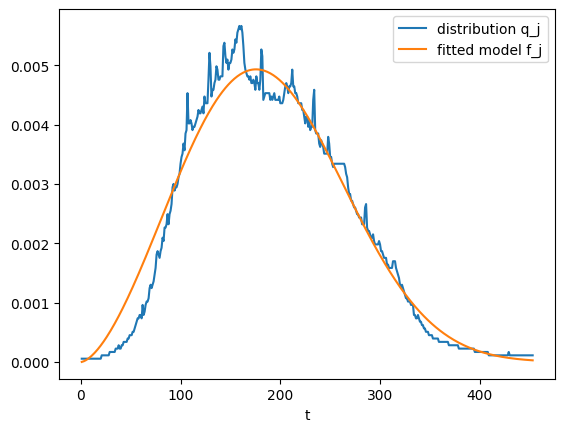

In [ ]:
import matplotlib.pyplot as plt

def weibull_pdf(t, alpha, beta):
    return (alpha / beta) * (t / beta)**(alpha - 1) * np.exp(-(t / beta)**alpha)

fitted = weibull_pdf(t, alpha_hat, beta_hat)

plt.plot(t, q, label="distribution q_j")
plt.plot(t, fitted, label="fitted model f_j")
plt.legend()
plt.xlabel("t")
plt.show()

**Task 2.7:**

In [ ]:
t, c = load_myspace_data()

def differential_equation(t, F, alpha=2.86, beta=215.91):
  return (alpha/beta) * ((t/beta) ** (alpha - 1)) * (1 - F)

sol = integrate.solve_ivp(differential_equation, t_span=(0, t[-1]), y0=[0], t_eval=t, method="RK45")
F_numeric = sol.y[0]

Data loaded successfully.
Total data points after trimming zeros: 453


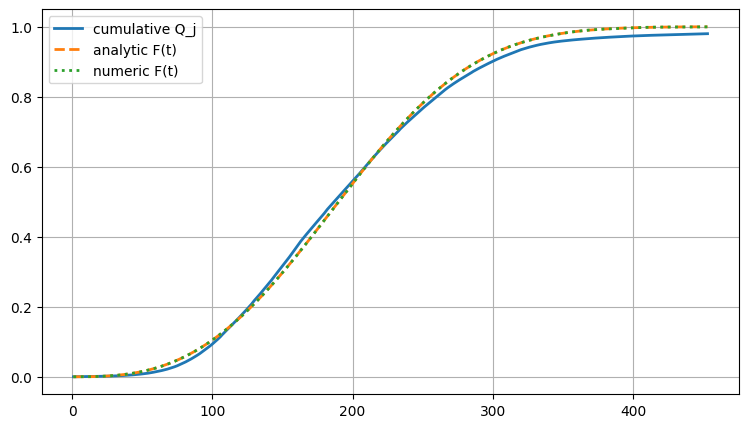

In [ ]:
q = (c / np.sum(c)) * 0.98
Q = np.cumsum(q)

F_analytic = weibull_cdf(t, 2.86, 215.91)

plt.figure(figsize=(9,5))
plt.plot(t, Q, label='cumulative Q_j', linewidth=2)
plt.plot(t, F_analytic, '--', label='analytic F(t)', linewidth=2)
plt.plot(t, F_numeric, ':', label='numeric F(t)', linewidth=2)
plt.legend()
plt.grid(True)
plt.show()

**Task 2.8:**

In [ ]:
t, c = load_myspace_data()

q = (c / np.sum(c)) * 0.98       # empirical discrete distribution (sum(q) ~ 0.98)
q_sum = np.sum(q)

device = torch.device("cpu")
t_np = t.astype(np.float32)
q_np = q.astype(np.float32)

t_torch = torch.from_numpy(t_np).to(device)          # shape (n,)
q_torch = torch.from_numpy(q_np).to(device)          # shape (n,)

# We'll train on normalized discrete probabilities; shape (n,1) to match PyTorch expectations
t_torch = t_torch.unsqueeze(1)  # shape (n,1)
q_torch = q_torch.unsqueeze(1)  # shape (n,1)

# --- 2) Model: learn two unconstrained parameters, map to positive via softplus ---
class WeibullParamModel(nn.Module):
    def __init__(self, init_alpha=2.0, init_beta=200.0):
        super().__init__()
        self.raw_alpha = nn.Parameter(torch.tensor(np.log(init_alpha), dtype=torch.float32))
        self.raw_beta  = nn.Parameter(torch.tensor(np.log(init_beta), dtype=torch.float32))

    def forward(self, t):
        alpha = torch.exp(self.raw_alpha)   # scalar > 0
        beta  = torch.exp(self.raw_beta)    # scalar > 0
        ratio = t / beta
        # numerically stable pdf: avoid ratio == 0 issues by adding eps inside pow if necessary
        pdf = (alpha / beta) * ratio.pow(alpha - 1.0) * torch.exp(- ratio.pow(alpha))
        return pdf, alpha, beta

# instantiate model
model = WeibullParamModel(init_alpha=2.0, init_beta=200.0).to(device)

# --- 3) Loss and optimizer ---
# We'll normalize predicted pdf to sum to q_sum so both distributions have same total mass (0.98)
# Loss: MSE between predicted discrete probabilities and q
optimizer = optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

# --- 4) Training loop ---
n_epochs = 4000
print_every = 500
loss_history = []

for epoch in range(1, n_epochs + 1):
    optimizer.zero_grad()
    pred_pdf, alpha_t, beta_t = model(t_torch)      # pred_pdf shape (n,1)
    # convert to discrete probability mass (sum = 1) then scale to q_sum (0.98)
    pred_p = pred_pdf.squeeze(1)
    pred_p_sum = pred_p.sum()
    # avoid dividing by zero
    pred_p = pred_p / (pred_p_sum + 1e-12) * 0.98
    pred_p = pred_p.unsqueeze(1)  # shape (n,1)

    loss = loss_fn(pred_p, q_torch)
    loss.backward()
    optimizer.step()
    loss_history.append(loss.item())

    if epoch % print_every == 0 or epoch == 1:
        print(f"epoch {epoch:04d}  loss={loss.item():.6e}  alpha={alpha_t.item():.4f}  beta={beta_t.item():.4f}")

Data loaded successfully.
Total data points after trimming zeros: 453
epoch 0001  loss=7.399549e-07  alpha=2.0000  beta=200.0000
epoch 0500  loss=9.635170e-08  alpha=2.6889  beta=210.7509
epoch 1000  loss=9.374714e-08  alpha=2.7432  beta=210.7179
epoch 1500  loss=9.374713e-08  alpha=2.7434  beta=210.7177
epoch 2000  loss=9.374714e-08  alpha=2.7434  beta=210.7177
epoch 2500  loss=9.374713e-08  alpha=2.7434  beta=210.7176
epoch 3000  loss=9.374713e-08  alpha=2.7434  beta=210.7176
epoch 3500  loss=9.374713e-08  alpha=2.7434  beta=210.7176
epoch 4000  loss=9.374713e-08  alpha=2.7434  beta=210.7176



Final: alpha = 2.7434, beta = 210.7176, final_loss = 9.374713e-08


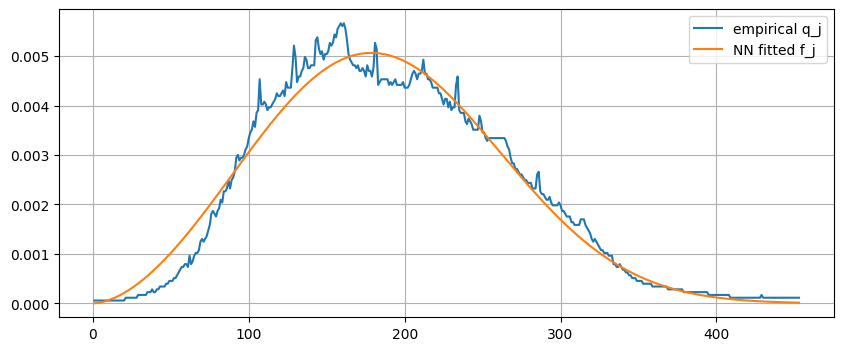

In [ ]:
# final parameters
pred_pdf, alpha_t, beta_t = model(t_torch)
pred_p = pred_pdf.squeeze(1)
pred_p = pred_p / (pred_p.sum() + 1e-12) * q_sum
alpha_hat = alpha_t.item()
beta_hat  = beta_t.item()

print(f"\nFinal: alpha = {alpha_hat:.4f}, beta = {beta_hat:.4f}, final_loss = {loss_history[-1]:.6e}")

# --- 5) Plot results ---
plt.figure(figsize=(10,4))
plt.plot(t, q, label="empirical q_j")
plt.plot(t, pred_p.detach().cpu().numpy(), label="NN fitted f_j")
plt.legend()
plt.grid(True)
plt.show()